In [1]:
import pandas as pd
#pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', 
#            fill_value=None, margins=False, dropna=True, margins_name='All', 
#            observed=False, sort=True)

In [2]:
df = pd.read_csv("Titanic.csv")
df

,last,first,gender,age,class,fare,embarked,survived
0,Braund,Mr. Owen Harris,M,22.0,3,7.2500,Southampton,no
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),F,38.0,1,71.2833,Cherbourg,yes
2,Heikkinen,Miss Laina,F,26.0,3,7.9250,Southampton,yes
3,Futrelle,Mrs. Jacques Heath (Lily May Peel),F,35.0,1,53.1000,Southampton,yes
4,Allen,Mr. William Henry,M,35.0,3,8.0500,Southampton,no
...,...,...,...,...,...,...,...,...
886,Montvila,Rev. Juozas,M,27.0,2,13.0000,Southampton,no
887,Graham,Miss Margaret Edith,F,19.0,1,30.0000,Southampton,yes
888,Johnston,"Miss Catherine Helen ""Carrie""",F,NaN,3,23.4500,Southampton,no
889,Behr,Mr. Karl Howell,M,26.0,1,30.0000,Cherbourg,yes


In [3]:
df.shape

(891, 8)

In [4]:
#duplicate rows
#dup = df[df.duplicated()]
df.duplicated().sum()

0

In [5]:
#duplicate rows of columns
#dupc = df[df.duplicated(['age','fare'])]
df.duplicated(['age','fare']).sum()

180

In [22]:
#null
df.isnull().any()
#df.isnull().any().any()
df.isnull().sum()
#fill = df.fillna(1)
#fill2 = df["age"].fillna(16)

last          0
first         0
gender        0
age         177
class         0
fare          0
embarked      0
survived      0
dtype: int64

# Solution 1

In [63]:
#For a male passenger, chances of survival are higher than that for female passenger
male = df.loc[(df['gender']=='M') & (df['survived'] == 'yes'),['survived']].count()
female = df.loc[(df['gender']=='F') & (df['survived'] == 'yes'),['survived']].count()

In [64]:
for i,j in zip(male,female):
    if(i>j):
        print("Yes")
    else:
        print("no")

no


In [65]:
#More number of females on the ship survived than those died
ded = df.loc[(df['gender']=='F') & (df['survived'] == 'no'),['survived']].count()
for i,j in zip(female,ded):
    if(i>j):
        print("yes")
    else:
        print("no")

yes


In [61]:
#The chances of survival are higher, if passenger would have purchased expensive ticket, 
#i.e. travelling with better class (3 being the least and 1 being the best)
three = df.loc[(df['class']==3)& (df['survived'] == 'yes'),['survived']].count()
two = df.loc[(df['class']==2) & (df['survived'] == 'yes'),['survived']].count()
one = df.loc[(df['class']==1)& (df['survived'] == 'yes'),['survived']].count()

In [84]:
for i,j,k in zip(one,two,three):
    if(i>j & j>k):
        print("yes")
    else:
        print("no")

no


survived    136
dtype: int64

In [59]:
#The ratio of number of males to females is

f = df.loc[(df['gender']=='F'),['gender']].count()
m = df.loc[(df['gender']=='M'),['gender']].count()

In [60]:
for i,j in zip(f,m):
    print(j/i)

1.8375796178343948


In [66]:
#The ratio of females to males with class 3 is
mthree = df.loc[(df['class']==3)& (df['gender'] == 'M'),['gender']].count()
fthree = df.loc[(df['class']==3)& (df['gender'] == 'F'),['gender']].count()

In [67]:
for i,j in zip(fthree,mthree):
    print(i/j)

0.414985590778098


In [68]:
#The ratio of males died to those survived  is
males = df.loc[(df['gender']=='M') & (df['survived'] == 'yes'),['survived']].count()
maled = df.loc[(df['gender']=='M') & (df['survived'] == 'no'),['survived']].count()
for i,j in zip(maled,males):
    print(i/j)

4.293577981651376


In [69]:
#The ratio of dead and survivers passengers of class 3 is
s3 = df.loc[(df['class']==3) & (df['survived'] == 'yes'),['survived']].count()
d3 = df.loc[(df['class']==3) & (df['survived'] == 'no'),['survived']].count()
for i,j in zip(d3,s3):
    print(i/j)


3.1260504201680672


In [71]:
#For which embarkment point, the ratio of people survived to those died was lowest
chers = df.loc[(df['embarked']=='Cherbourg') & (df['survived'] == 'yes'),['survived']].count()
cherd = df.loc[(df['embarked']=='Cherbourg') & (df['survived'] == 'no'),['survived']].count()
queens = df.loc[(df['embarked']=='Queenstown') & (df['survived'] == 'yes'),['survived']].count()
queend = df.loc[(df['embarked']=='Queenstown') & (df['survived'] == 'no'),['survived']].count()
souths = df.loc[(df['embarked']=='Southampton') & (df['survived'] == 'yes'),['survived']].count()
southd = df.loc[(df['embarked']=='Southampton') & (df['survived'] == 'no'),['survived']].count()

for i,j,k,l,m,n in zip(chers,cherd,queens,queend,souths,southd):
    a = i/j
    b = j/l
    c = m/n
    print(a)
    print(b)
    print(c)
    print(min(a,b,c))

1.24
1.5957446808510638
0.5128805620608899
0.5128805620608899


# Solution 2

<AxesSubplot:>

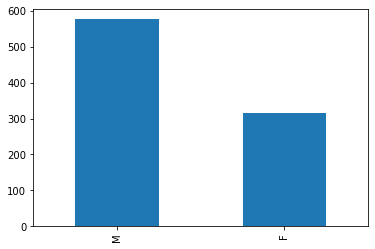

In [72]:
#we want to plot analysis by gender indicating the ratio of men:woman in a bar chart
df['gender'].value_counts().plot.bar()

In [74]:
#rite the (SQL like) query for dataframe to retrieval records of males survived 
df.query('gender=="M" & survived=="yes"')

,last,first,gender,age,class,fare,embarked,survived
17,Williams,Mr. Charles Eugene,M,NaN,2,13.0000,Southampton,yes
21,Beesley,Mr. Lawrence,M,34.0,2,13.0000,Southampton,yes
23,Sloper,Mr. William Thompson,M,28.0,1,35.5000,Southampton,yes
36,Mamee,Mr. Hanna,M,NaN,3,7.2292,Cherbourg,yes
55,Woolner,Mr. Hugh,M,NaN,1,35.5000,Southampton,yes
...,...,...,...,...,...,...,...,...
838,Chip,Mr. Chang,M,32.0,3,56.4958,Southampton,yes
839,Marechal,Mr. Pierre,M,NaN,1,29.7000,Cherbourg,yes
857,Daly,Mr. Peter Denis,M,51.0,1,26.5500,Southampton,yes
869,Johnson,Master Harold Theodor,M,4.0,3,11.1333,Southampton,yes


In [81]:
#For a male passenger, chances of survival are higher than that for female passenger
df['gender'].value_counts()

M    577
F    314
Name: gender, dtype: int64

In [82]:
#More number of females on the ship survived than those died
df.groupby(['gender','survived']).count()
#df.groupby(['gender','survived']).count()['first']

last  first  age  class  fare  embarked
gender survived                                         
F      no          81     81   64     81    81        81
       yes        233    233  197    233   233       233
M      no         468    468  360    468   468       468
       yes        109    109   93    109   109       109

In [83]:
#The chances of survival are higher, if passenger would have purchased expensive ticket, 
#i.e. travelling with better class (3 being the least and 1 being the best)
df.groupby(['class','survived']).count()

last  first  gender  age  fare  embarked
class survived                                          
1     no          80     80      80   64    80        80
      yes        136    136     136  122   136       136
2     no          97     97      97   90    97        97
      yes         87     87      87   83    87        87
3     no         372    372     372  270   372       372
      yes        119    119     119   85   119       119

In [88]:
pivot = pd.pivot_table(data = df,values='last',index='gender',columns='survived',aggfunc='count')
pivot

survived,no,yes
gender,,
F,81,233
M,468,109


In [89]:
pivot2 = pd.pivot_table(data = df,values='last',index='class',columns='survived',aggfunc='count')
pivot2

survived,no,yes
class,,
1,80,136
2,97,87
3,372,119


In [90]:
pivot3 = pd.pivot_table(data = df,values='last',index='class',columns='gender',aggfunc='count')
pivot3

gender,F,M
class,,
1,94,122
2,76,108
3,144,347


In [91]:
#For which embarkment point, the ratio of people survived to those died was lowest
pivot4 = pd.pivot_table(data = df,values='last',index='embarked',columns='survived',aggfunc='count')
pivot4

survived,no,yes
embarked,,
Cherbourg,75,93
Queenstown,47,30
Southampton,427,219


In [94]:
print(round(93/75,2))
print(round(30/47,2))
print(round(219/427,2))

1.24
0.64
0.51


In [103]:
#renaming column
df.rename(columns = {'class':'passenger_class'}, inplace = True)

In [109]:
#conditional probability
#P(A|B) = P(A∩B)/P(B)
#P(survived|male,class1) = P(survived ∩ male ∩ class1)/P(male ∩ class1)
#df.query('gender == "M" and class == 1 and survived == "yes"').shape()
df.query('survived=="yes" and passenger_class==1 and gender=="M"').shape[0]
len_df = len(df)
len_df

891

In [125]:
p_male_1 = df.query('passenger_class==1 and gender=="M"').shape[0]/len_df
p_male_2 = df.query('passenger_class==2 and gender=="M"').shape[0]/len_df
p_male_3 = df.query('passenger_class==3 and gender=="M"').shape[0]/len_df
p_female_1 = df.query('passenger_class==1 and gender=="F"').shape[0]/len_df
p_female_2 = df.query('passenger_class==2 and gender=="F"').shape[0]/len_df
p_female_3 = df.query('passenger_class==3 and gender=="F"').shape[0]/len_df

p_survived_male_1 = df.query('survived=="yes" and passenger_class==1 and gender=="M"').shape[0]/len_df
p_survived_male_2 = df.query('survived=="yes" and passenger_class==2 and gender=="M"').shape[0]/len_df
p_survived_male_3 = df.query('survived=="yes" and passenger_class==3 and gender=="M"').shape[0]/len_df
p_survived_female_1 = df.query('survived=="yes" and passenger_class==1 and gender=="F"').shape[0]/len_df
p_survived_female_2 = df.query('survived=="yes" and passenger_class==2 and gender=="F"').shape[0]/len_df
p_survived_female_3 = df.query('survived=="yes" and passenger_class==3 and gender=="F"').shape[0]/len_df


      



In [117]:
p_survied_yes_female_1 = p_survived_female_1/p_female_1
print(round(p_survied_yes_female_1,2))
p_survied_yes_female_2 = p_survived_female_2/p_female_2
print(round(p_survied_yes_female_2,2))
p_survied_yes_female_3 = p_survived_female_3/p_female_3
print(round(p_survied_yes_female_3,2))

0.97
0.92
0.5


In [120]:
p_survied_yes_male_1 = p_survived_male_1/p_male_1
print(round(p_survied_yes_male_1,2))


0.37


In [122]:
p_survied_yes_male_2 = p_survived_male_2/p_male_2
print(round(p_survied_yes_male_2,2))


0.16


In [127]:
p_survied_yes_male_3 = p_survived_male_3/p_male_3


In [130]:
print(round(p_survied_yes_male_3,2))

0.14


In [5]:
df.query('gender=="M"').shape[0]/df.query('gender=="F" ').shape[0]

1.8375796178343948